# Ungraded Lab: Huber Loss

In this lab, we'll walk through how to create custom loss functions. In particular, we'll code the [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss) and use that in training the model.

## Imports

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
from tensorflow import keras

## Prepare the Data

Our dummy dataset is just a pair of arrays `xs` and `ys` defined by the relationship $y = 2x - 1$. `xs` are the inputs while `ys` are the labels.

In [2]:
# inputs
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Training the model

Let's build a simple model and train using a built-in loss function like the `mean_squared_error`.

In [3]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

print(model.predict([10.0]))

[[18.980856]]


### Custom Loss

Now let's see how we can use a custom loss. We first define a function that accepts the ground truth labels (`y_true`) and model predictions (`y_pred`) as parameters. We then compute and return the loss value in the function definition.

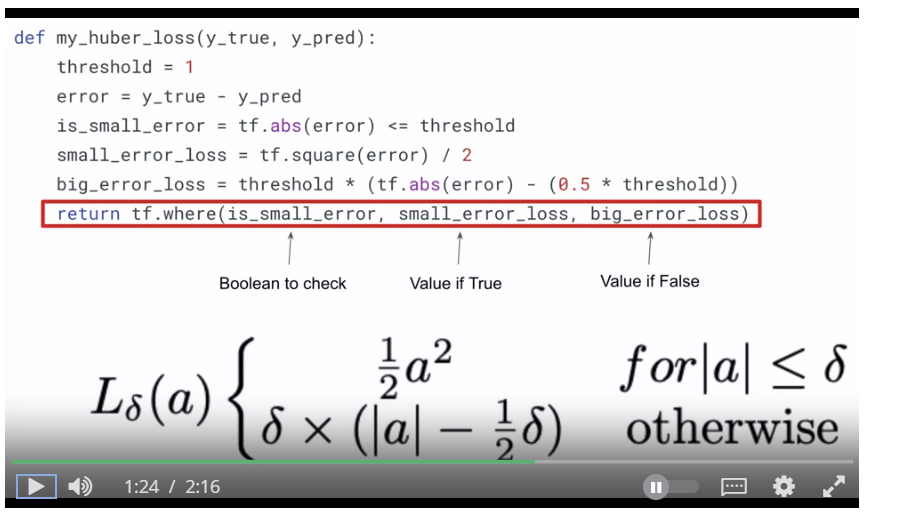

In [4]:
def my_huber_loss(y_true, y_pred):
    threshold = 1
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))
    return tf.where(is_small_error, small_error_loss, big_error_loss)

Using the loss function is as simple as specifying the loss function in the `loss` argument of `model.compile()`.

In [5]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=my_huber_loss)
model.fit(xs, ys, epochs=500,verbose=0)
print(model.predict([10.0]))

[[18.828108]]
